# Wandererz Car Rental Business 
# NAME: GRACIA BALRAJ
# COHORT: 2022-12-DE
# DATE:JUNE 9, 2023

### Wandererz Car Rentals was started 10 years ago as a small business in Fayetville, Arkansas, USA and has currently expanded to 5 states and 10 locations. The goal is to eventually go nationwide. There are currently 5 employees in each location managing a large inventory of cars.

#### The Business Process Model and ER Diagram were created using LucidChart

### BUSINESS PROCESS MODEL

https://lucid.app/publicSegments/view/78ccb519-0ef2-42b1-98c7-454331fa4563/image.jpeg

### ER DIAGRAM :

https://lucid.app/publicSegments/view/5e324f8a-e243-40e9-a290-0739264f92ca/image.jpeg




### TABLE DETAILS

#### LOCATION TABLE- This table has all details of the locations of the car rental service. Currently there are 10 locations across 5 states.

#### CARINVENTORY TABLE- This table has details of all the cars in the inventory of the car rental service including model number , availability and daily rent.Avaiability can be C- With Customer,S- gone for service, U- Under repair, A-Available, R-Reserved.

#### CUSTOMER TABLE- This table has all details of the customers including their payment information.

#### CARMODEL TABLE- This is a table containing different models of cars. It also has specific details of the cars like their category( Sedan, Hatchback, SUV, Minivan or Pickup) and specific fuel tank capacity 

#### STAFF TABLE- This table has all details of the staff members (5 in each location)

#### RESERVE TABLE- This table has all car reservation and cancellation details

#### RENT TABLE- This table has car rental details including pickup and drop off . This includes the daily insurance rate, pickup and drop of dates ,fuel level at car drop off (.25 for quarter tank, .50 for half tank, .75 for 3/4th tank and 1 for full tank), current fuel rate, odometer readings and charges. If the tank is not full at drop off a refuelling fee of 1 dollar is added per gallon to the current fuel rate

### DDL FOR THE TABLES

In [ ]:
CREATE TABLE [location] (
  [locid] VARCHAR(5),
  [locaddr] VARCHAR(100),
  [loccity] VARCHAR(20),
  [locstate] VARCHAR(2)
  [loczip] BIGINT,
  [locphone] BIGINT,
  [locemail] VARCHAR(20),
  [loclat] FLOAT,
  [loclong] FLOAT,
  PRIMARY KEY ([locid])
);

CREATE TABLE [carinventory] (
  [vinno] VARCHAR(17),
  [locid] VARCHAR(5),
  [modelid] VARCHAR(8),
  [avail] VARCHAR(1),
  [dlyrent] FLOAT,
  PRIMARY KEY ([vinno])
);

CREATE TABLE [customer] (
  [custid] VARCHAR(8),
  [custdlno] VARCHAR(9),
  [custname] VARCHAR(20),
  [custadd] VARCHAR(100),
  [custcity] VARCHAR(20),
  [custstate] VARCHAR(2),
  [custzip] BIGINT,
  [custdob] DATE,
  [custphone] BIGINT,
  [custemail] VARCHAR(20),
  [pymethod] VARCHAR(10),
  [cardno] VARCHAR(16),
  [expmth] INT,
  [expyr] INT,
  PRIMARY KEY ([custid])
);

CREATE TABLE [staff] (
  [staffid] VARCHAR(5),
  [locid] VARCHAR(5),
  [staffname] VARCHAR(100),
  [staffadd] VARCHAR(100),
  [staffcity] VARCHAR(20),
  [staffstate] VARCHAR(2),
  [staffzip] BIGINT,
  [staffdob] DATE,
  [staffdoj] DATE,
  [staffsex] VARCHAR(1),
  [staffphone] BIGINT,
  [staffemail] VARCHAR(20),
  PRIMARY KEY ([staffid])
);

CREATE TABLE [rent] (
  [rentid] VARCHAR(8),
  [locid] VARCHAR(5),
  [vinno] VARCHAR(17),
  [custid] VARCHAR(8),
  [staffid] VARCHAR(5),
  [insurance] INT,
  [pkdate] DATE,
  [pktime] TIME,
  [odoout] BIGINT,
  [drpdate] DATE,
  [drptime] TIME,
  [gasin] FLOAT,
  [odoin] BIGINT,
  [gasrate] FLOAT,
  [charge] FLOAT,
  PRIMARY KEY ([rentid]),
    CONSTRAINT[rent_fk1] FOREIGN KEY ([locid]) REFERENCES [location]([locid]),
    CONSTRAINT[rent_fk2] FOREIGN KEY ([vinno]) REFERENCES [carinventory]([vinno]),
    CONSTRAINT[rent_fk3] FOREIGN KEY ([custid]) REFERENCES [customer]([custid]),
    CONSTRAINT[rent_fk4] FOREIGN KEY ([staffid]) REFERENCES [staff]([staffid])
);

CREATE TABLE [reserve] (
  [reserveid] VARCHAR(8),
  [locid] VARCHAR(5),
  [vinno] VARCHAR(17),
  [custid] VARCHAR(8),
  [resdate] DATE,
  [restime] TIME,
  [pkdate] DATE,
  [pktime] TIME,
  [drpdate] DATE,
  [drptime] TIME,
  [cancdate] DATE,
  [canctime] TIME,
  PRIMARY KEY ([reserveid]),
    CONSTRAINT[reserve_fk1] FOREIGN KEY ([locid]) REFERENCES [location]([locid]),
    CONSTRAINT[reserve_fk1] FOREIGN KEY ([vinno]) REFERENCES [carinventory]([vinno]),
    CONSTRAINT[reserve_fk1] FOREIGN KEY ([custid]) REFERENCES [customer]([custid]),

);

CREATE TABLE [carmodels] (
  [modelid] VARCHAR(8),
  [cyear] INT,
  [cmake] VARCHAR(20),
  [cmodel] VARCHAR(100),
  [carcat] VARCHAR(20),
  [tankcap] INT,
  PRIMARY KEY ([modelid])
);


###  GENERATED MOCK DATA FOR EACH TABLE IN RDS DATABASE

#### LOCATION.CSV

 -Manually created locid,locaddr,loccity,loczip,loclat and loclong columns. <br>
 -Used random data generator to populate locphone and locemail columns.

#### STAFF.CSV

 -Used Python code to populate locid,staffcity,staffstate,staffzip columns from location table <br>
(there are 5 staff in each location) 
 -Used the random data generator to populate staffid, staffname, staffadd, staffdob, staffphone and staffemail columns. <br>
 -Manually populated staffsex column.<br>

#### ADDRSTAFFLOC.PY

In [ ]:
#creating a csv file (locs.csv) with location id, city, state and zip to populate staff file


file=open('locs.csv','w',newline='')
writer=csv.writer(file)
with open('location.csv', mode='r') as loc_file:
    csv_reader = csv.DictReader(loc_file)
    for row in csv_reader:
        i=0
        # 5 staff in each city
        for i in range(5):
            writer.writerow([row["locid"],row["loccity"],row["locstate"],str(row["loczip"])])
            i += 1

file.close()


#### CUSTOMER.CSV

-Used random data generator to create custid, custdlno, custname, custadd, custcity, 
 custstate, custzip, custdob,custphone,custemail, cardno, expmth and expyr. <br>
-Manually populated pymethod.

#### CARINVENTORY.CSV

-Used Python code below to generate the car vinnumbers to populate vinno column. <br>
-Manually populated locid and modelid using columns in location.csv and carmodels. <br>
-Populated avail  and dlyrent columns by using random data generator.

#### RANDOMVINTOCSV.PY

In [ ]:
#creating a vehvinno.csv which has 500 random vehicle vin numbers for use in vehicle table
import random
import string
import csv

file=open('vehvinno.csv','w',newline='')
writer=csv.writer(file)

#avoiding I, O and Q in vin number as thats the industry code so it is not confused with numbers
unwanted_chars='IOQ'

# number of vin numbers can be scaled by modifying the range
for i in range(500):
    #Vin numbers must be 17 characters in this format 1G3HR19675D132811
    vinno=''
    vinno=vinno+str(random.randint(1,9))
    vinno=vinno+str(random.choice([s for s in string.ascii_uppercase if s not in unwanted_chars]))
    vinno = vinno + str(random.randint(1, 9))
    vinno = vinno + str(random.choice([s for s in string.ascii_uppercase if s not in unwanted_chars]))
    vinno = vinno + str(random.choice([s for s in string.ascii_uppercase if s not in unwanted_chars]))
    vinno = vinno + str(random.randint(11111, 99999))
    vinno = vinno + str(random.choice([s for s in string.ascii_uppercase if s not in unwanted_chars]))
    vinno = vinno + str(random.randint(111111, 999999))
    print(vinno)
    writer.writerow([vinno])
file.close()


#### CARMODELS.CSV

-Used the car model data from https://github.com/abhionlyone/us-car-models-data/blob/master/2023.csv  
 to get the cmake,cmodel and carcat columns of the carmodels.csv file. <br>
-Used random data generator to generate random years between 2015 and 2022 to populate cyear column. <br>
-Used the following python code to generate the unique model numbers (modelid column). <br>
-Manually populated the tank capacity column tankcap with 14 for hatchback and sedan, 16 for SUV ,
 20 for minivan and 22 for pickup.

In [ ]:
import random
import string
import csv
#creating a csv file (modelno.csv) with model numbers from carmodels.csv
# using the first letter of make + year + 3 random integers to create a unique modelid
file=open('modelno.csv','w',newline='')
writer=csv.writer(file)
with open('carmodels.csv', mode='r') as model_file:
    csv_reader = csv.DictReader(model_file)
    line_count = 0
    for row in csv_reader:
        prt_str=""
        prt_str=prt_str+row["cmake"][0:1]+str(row["cyear"])+str(random.randint(111, 999))
        print(prt_str)
        writer.writerow([prt_str])
        line_count += 1
    print(f'Processed {line_count} lines.')
file.close()

#### MERGING THE CSV FILES 

-Used panda data frames to do a join on location.csv, staff.csv to get staff in a particular location
and putting that in filecust.csv. <br>
-Joined location.csv, carinventory.csv and carmodels.csv to get all the cars and model numbers in each 
location and putting it in filecars.csv. <br>
-This data will be used to populate both reserve.csv and rent.csv


#### JOINFORRESANDRENT.PY

In [ ]:
import string
import csv
import pandas as pd
pd.set_option('display.max_columns',5000)
pd.set_option('display.max_rows',600)
df_loc=pd.read_csv('location.csv')
df_car=pd.read_csv('carinventory.csv')
df_staff=pd.read_csv('staff.csv')
df_model=pd.read_csv('carmodels.csv')
#finding cars and staff in each location by joining 3 dataframes
#Joining 2 files on locid
df_join1=pd.merge(df_loc,df_car,on='locid')
df_join2=pd.merge(df_loc,df_staff,on='locid')
#Extracting needed columns
df1=df_join1[['locid','vinno','modelid','dlyrent']]
df2=df_join2[['locid','staffid']]
#Sorting results
df_sorted1=df2.sort_values(by=['locid'])
#Joining on 3rd dataframe
df_join3=pd.merge(df1,df_model,on='modelid')
#Sorting results and extractng needed fields
df_sorted=df_join3.sort_values(by=['locid'])
df3=df_sorted[['locid','vinno','dlyrent','odometer','carcat']]

df3.to_csv('filecars.csv')
df_sorted1.to_csv('filecust.csv')

#### RESERVE.CSV

-Used the joined data to manually populate locid and vinno. <br>
-Manually populated custid,cancdate and canctime. <br>
-Used random data generator to populate resid,resdate,restime,pktime,drptime. <br>
-Used the following python code to populate pkdate and drpdate.

#### POPRES.PY

In [ ]:
import string
import csv
from datetime import date,datetime,timedelta
import pandas as pd

#CACULATE AND POPULATE PICKUP DATE AND DROP DATE IN RESERVE TABLE ACCORDING TO RESERVE DATE
df_res=pd.read_csv('reserve2.csv')
df_res['resdate']=pd.to_datetime(df_res['resdate'])
df_res['pkdate']=df_res['resdate']+timedelta(days=3)
df_res['dropdate']=df_res['pkdate']+timedelta(days=4)
df_res['resdate']=df_res['resdate'].dt.strftime('%m/%d/%Y')
df_res['pkdate']=df_res['pkdate'].dt.strftime('%m/%d/%Y')
df_res['dropdate']=df_res['dropdate'].dt.strftime('%m/%d/%Y')
print(df_res[['resdate','pkdate','dropdate']])
df_res.to_csv('reserve.csv')

#### RENT.CSV

-Used the 2 merged files to populate locid, vinno, staffed, insurance, gasrate. <br>
-Used random data generator to populate rentid,pkdate,pktime,odoin,droptime,gasin. <br>
-Manually populated custid. <br>
-Used python code below to populate dropdate,odoin and calculate the rental charge. <br>
 This code creates mergefile.csv from which the rent.csv file is populated
 
 #### RENTCHARGE.PY

In [ ]:
import string
import csv
import random

from datetime import date,datetime,timedelta
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',5000)
pd.set_option('display.max_rows',600)

#CACULATE  DROP DATE,ODOMETER at DROPOFF and charges for population of Rent table
#read all 3 files into data frames
df_rent=pd.read_csv('rent.csv')
df_carinvent=pd.read_csv('carinventory.csv')
df_carmod=pd.read_csv('carmodels.csv')
#convert pick date column to date datatype and add random days to create a drop off date
df_rent['pkdate']=pd.to_datetime(df_rent['pkdate'])
df_rent['dropdate']=df_rent['pkdate']+pd.to_timedelta(np.random.randint(1,9, size=len(df_rent)), unit='d')

#add random miles to odometer as odometer reading at drop off
df_rent['odoin']=df_rent['odoout']+random.randint(200,1000)

# Calculate car rental charges
#doing a join on all 3 dataframes in order to get all relevant details of daily rent, tank capacity etc
df_merge=pd.merge(pd.merge(df_rent,df_carinvent,on='vinno'),df_carmod,on='modelid')
#dropping duplicate rows
df_merge=df_merge.drop_duplicates(subset=['rentid'])
#sorting based on rentid
df_merge=df_merge.sort_values(by=['rentid'])

#calculating total rent based on daily rent
df_merge['charge']=(df_merge['dropdate']-df_merge['pkdate'])*df_merge['dlyrent']

#adding insurance if selected to daily rent
df_merge['charge']=df_merge['charge']+((df_merge['dropdate']-df_merge['pkdate'])*df_merge['insurance'])
#converting charge  from days to integer
df_merge['charge']=df_merge['charge'].dt.days


#add gas charge to total rental rate if gas tank was not given back full with refuelling fee(1$extra for every gallon of gas)
df_merge['charge']=df_merge['charge']+(((1-df_merge['gasin'])*df_merge['tankcap'])*(df_merge['gasrate']+1))
#put the merged details into mergefile.csv
df_merge.to_csv('mergefile.csv')


### CREATED A DATABASE IN RDS AND UPLOADED THE 7 CSV FILES INTO IT USING AZURE DATA STUDIO
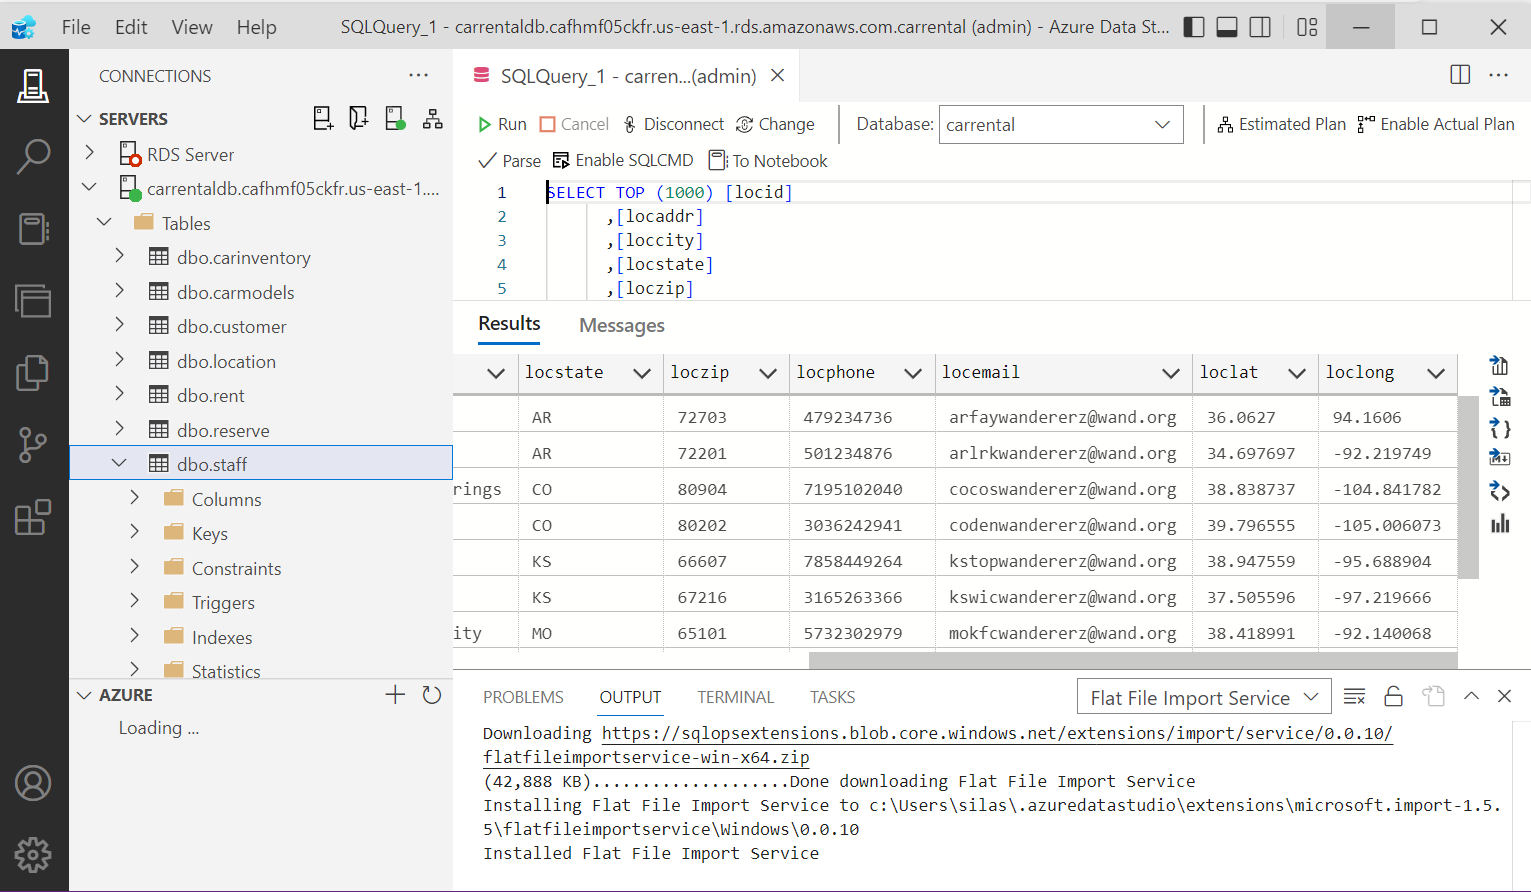

### INGESTED DATA FROM RDS to S3 USING A GLUE JOB
### THE RAW S3 FILES ARE IN EXTRACTED INTO s3://graciadecapstone/carrentalcsv/
### THE TRANSFORMED PARQUET FILES ARE LOADED INTO s3://graciadecapstone/verifieddata/

#### RDSTOS3GLUEJOB.PY

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node rent table
renttable_node1685663444847 = glueContext.create_dynamic_frame.from_options(
    connection_type="sqlserver",
    connection_options={
        "useConnectionProperties": "true",
        "dbtable": "rent",
        "connectionName": "rdstoglue",
    },
    transformation_ctx="renttable_node1685663444847",
)

# Script generated for node carinventory
carinventory_node1685663444215 = glueContext.create_dynamic_frame.from_options(
    connection_type="sqlserver",
    connection_options={
        "useConnectionProperties": "true",
        "dbtable": "carinventory",
        "connectionName": "rdstoglue",
    },
    transformation_ctx="carinventory_node1685663444215",
)

# Script generated for node Staff table
Stafftable_node1685663443105 = glueContext.create_dynamic_frame.from_options(
    connection_type="sqlserver",
    connection_options={
        "useConnectionProperties": "true",
        "dbtable": "staff",
        "connectionName": "rdstoglue",
    },
    transformation_ctx="Stafftable_node1685663443105",
)

# Script generated for node Customer table
Customertable_node1685662785443 = glueContext.create_dynamic_frame.from_options(
    connection_type="sqlserver",
    connection_options={
        "useConnectionProperties": "true",
        "dbtable": "customer",
        "connectionName": "rdstoglue",
    },
    transformation_ctx="Customertable_node1685662785443",
)

# Script generated for node location table
locationtable_node1685662652543 = glueContext.create_dynamic_frame.from_options(
    connection_type="sqlserver",
    connection_options={
        "useConnectionProperties": "true",
        "dbtable": "location",
        "connectionName": "rdstoglue",
    },
    transformation_ctx="locationtable_node1685662652543",
)

# Script generated for node carmodels table
carmodelstable_node1685663699894 = glueContext.create_dynamic_frame.from_options(
    connection_type="sqlserver",
    connection_options={
        "useConnectionProperties": "true",
        "dbtable": "carmodels",
        "connectionName": "rdstoglue",
    },
    transformation_ctx="carmodelstable_node1685663699894",
)

# Script generated for node reserve table
reservetable_node1685663698087 = glueContext.create_dynamic_frame.from_options(
    connection_type="sqlserver",
    connection_options={
        "useConnectionProperties": "true",
        "dbtable": "reserve",
        "connectionName": "rdstoglue",
    },
    transformation_ctx="reservetable_node1685663698087",
)

# Script generated for node rent bucket
rentbucket_node1685663337617 = glueContext.write_dynamic_frame.from_options(
    frame=renttable_node1685663444847,
    connection_type="s3",
    format="csv",
    connection_options={
        "path": "s3://graciadecapstone/carrentalcsv/rent/",
        "partitionKeys": [],
    },
    transformation_ctx="rentbucket_node1685663337617",
)

# Script generated for node Amazon S3
AmazonS3_node1685663336479 = glueContext.write_dynamic_frame.from_options(
    frame=carinventory_node1685663444215,
    connection_type="s3",
    format="csv",
    connection_options={
        "path": "s3://graciadecapstone/carrentalcsv/carinventory/",
        "partitionKeys": [],
    },
    transformation_ctx="AmazonS3_node1685663336479",
)

# Script generated for node staff bucket
staffbucket_node1685663332879 = glueContext.write_dynamic_frame.from_options(
    frame=Stafftable_node1685663443105,
    connection_type="s3",
    format="csv",
    connection_options={
        "path": "s3://graciadecapstone/carrentalcsv/staff/",
        "partitionKeys": [],
    },
    transformation_ctx="staffbucket_node1685663332879",
)

# Script generated for node Customer bucket
Customerbucket_node3 = glueContext.write_dynamic_frame.from_options(
    frame=Customertable_node1685662785443,
    connection_type="s3",
    format="csv",
    connection_options={
        "path": "s3://graciadecapstone/carrentalcsv/customer/",
        "partitionKeys": [],
    },
    transformation_ctx="Customerbucket_node3",
)

# Script generated for node location bucket
locationbucket_node1685663323859 = glueContext.write_dynamic_frame.from_options(
    frame=locationtable_node1685662652543,
    connection_type="s3",
    format="csv",
    connection_options={
        "path": "s3://graciadecapstone/carrentalcsv/location/",
        "partitionKeys": [],
    },
    transformation_ctx="locationbucket_node1685663323859",
)

# Script generated for node carmodels bucket
carmodelsbucket_node1685663707560 = glueContext.write_dynamic_frame.from_options(
    frame=carmodelstable_node1685663699894,
    connection_type="s3",
    format="csv",
    connection_options={
        "path": "s3://graciadecapstone/carrentalcsv/carmodels/",
        "partitionKeys": [],
    },
    transformation_ctx="carmodelsbucket_node1685663707560",
)

# Script generated for node reserve bucket
reservebucket_node1685663708298 = glueContext.write_dynamic_frame.from_options(
    frame=reservetable_node1685663698087,
    connection_type="s3",
    format="csv",
    connection_options={
        "path": "s3://graciadecapstone/carrentalcsv/reserve/",
        "partitionKeys": [],
    },
    transformation_ctx="reservebucket_node1685663708298",
)

job.commit()

#### TRANSFORMING THE CSV FILES TO PARQUET FILES AND PUTTING IT IN S3 USING GLUE JOBS

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node location table
locationtable_node1 = glueContext.create_dynamic_frame.from_options(
    format_options={
        "quoteChar": '"',
        "withHeader": True,
        "separator": ",",
        "optimizePerformance": False,
    },
    connection_type="s3",
    format="csv",
    connection_options={
        "paths": ["s3://graciadecapstone/carrentalcsv/location/"],
        "recurse": True,
    },
    transformation_ctx="locationtable_node1",
)

# Script generated for node carmodels table
carmodelstable_node1686004548349 = glueContext.create_dynamic_frame.from_options(
    format_options={
        "quoteChar": '"',
        "withHeader": True,
        "separator": ",",
        "optimizePerformance": False,
    },
    connection_type="s3",
    format="csv",
    connection_options={
        "paths": ["s3://graciadecapstone/carrentalcsv/carmodels/"],
        "recurse": True,
    },
    transformation_ctx="carmodelstable_node1686004548349",
)

# Script generated for node customer table
customertable_node1686002395454 = glueContext.create_dynamic_frame.from_options(
    format_options={
        "quoteChar": '"',
        "withHeader": True,
        "separator": ",",
        "optimizePerformance": False,
    },
    connection_type="s3",
    format="csv",
    connection_options={
        "paths": ["s3://graciadecapstone/carrentalcsv/customer/"],
        "recurse": True,
    },
    transformation_ctx="customertable_node1686002395454",
)

# Script generated for node rent table
renttable_node1686002484658 = glueContext.create_dynamic_frame.from_options(
    format_options={
        "quoteChar": '"',
        "withHeader": True,
        "separator": ",",
        "optimizePerformance": False,
    },
    connection_type="s3",
    format="csv",
    connection_options={
        "paths": ["s3://graciadecapstone/carrentalcsv/rent/"],
        "recurse": True,
    },
    transformation_ctx="renttable_node1686002484658",
)

# Script generated for node staff table
stafftable_node1686002370116 = glueContext.create_dynamic_frame.from_options(
    format_options={
        "quoteChar": '"',
        "withHeader": True,
        "separator": ",",
        "optimizePerformance": False,
    },
    connection_type="s3",
    format="csv",
    connection_options={
        "paths": ["s3://graciadecapstone/carrentalcsv/staff/"],
        "recurse": True,
    },
    transformation_ctx="stafftable_node1686002370116",
)

# Script generated for node reserve table
reservetable_node1686002486413 = glueContext.create_dynamic_frame.from_options(
    format_options={
        "quoteChar": '"',
        "withHeader": True,
        "separator": ",",
        "optimizePerformance": False,
    },
    connection_type="s3",
    format="csv",
    connection_options={
        "paths": ["s3://graciadecapstone/carrentalcsv/reserve/"],
        "recurse": True,
    },
    transformation_ctx="reservetable_node1686002486413",
)

# Script generated for node carinventory table
carinventorytable_node1686002482781 = glueContext.create_dynamic_frame.from_options(
    format_options={
        "quoteChar": '"',
        "withHeader": True,
        "separator": ",",
        "optimizePerformance": False,
    },
    connection_type="s3",
    format="csv",
    connection_options={
        "paths": ["s3://graciadecapstone/carrentalcsv/carinventory/"],
        "recurse": True,
    },
    transformation_ctx="carinventorytable_node1686002482781",
)

# Script generated for node transform location table
transformlocationtable_node3 = glueContext.write_dynamic_frame.from_options(
    frame=locationtable_node1,
    connection_type="s3",
    format="glueparquet",
    connection_options={
        "path": "s3://graciadecapstone/verifieddata/location/",
        "partitionKeys": [],
    },
    transformation_ctx="transformlocationtable_node3",
)

# Script generated for node Amazon S3
AmazonS3_node1686004600203 = glueContext.write_dynamic_frame.from_options(
    frame=carmodelstable_node1686004548349,
    connection_type="s3",
    format="glueparquet",
    connection_options={
        "path": "s3://graciadecapstone/verifieddata/carmodels/",
        "partitionKeys": [],
    },
    transformation_ctx="AmazonS3_node1686004600203",
)

# Script generated for node transform customer table
transformcustomertable_node1686002652098 = glueContext.write_dynamic_frame.from_options(
    frame=customertable_node1686002395454,
    connection_type="s3",
    format="glueparquet",
    connection_options={
        "path": "s3://graciadecapstone/verifieddata/customer/",
        "partitionKeys": [],
    },
    transformation_ctx="transformcustomertable_node1686002652098",
)

# Script generated for node transform rent table
transformrenttable_node1686002644134 = glueContext.write_dynamic_frame.from_options(
    frame=renttable_node1686002484658,
    connection_type="s3",
    format="glueparquet",
    connection_options={
        "path": "s3://graciadecapstone/verifieddata/reserve/",
        "partitionKeys": [],
    },
    transformation_ctx="transformrenttable_node1686002644134",
)

# Script generated for node transform staff table
transformstafftable_node1686002863616 = glueContext.write_dynamic_frame.from_options(
    frame=stafftable_node1686002370116,
    connection_type="s3",
    format="glueparquet",
    connection_options={
        "path": "s3://graciadecapstone/verifieddata/staff/",
        "partitionKeys": [],
    },
    transformation_ctx="transformstafftable_node1686002863616",
)

# Script generated for node transform reserve table
transformreservetable_node1686002637486 = glueContext.write_dynamic_frame.from_options(
    frame=reservetable_node1686002486413,
    connection_type="s3",
    format="glueparquet",
    connection_options={
        "path": "s3://graciadecapstone/verifieddata/reserve/",
        "partitionKeys": [],
    },
    transformation_ctx="transformreservetable_node1686002637486",
)

# Script generated for node transform carinventory table
transformcarinventorytable_node1686002648613 = (
    glueContext.write_dynamic_frame.from_options(
        frame=carinventorytable_node1686002482781,
        connection_type="s3",
        format="glueparquet",
        connection_options={
            "path": "s3://graciadecapstone/verifieddata/carinventory/",
            "partitionKeys": [],
        },
        transformation_ctx="transformcarinventorytable_node1686002648613",
    )
)

job.commit()


# SETTING UP TABLES TOWARDS DATA ANALYSIS

## ANALYSIS: WHICH CAR MODELS ARE IN MOST DEMAND IN EACH LOCATION SO THE COMPANY CAN PURCHASE MORE RELEVANT CARS FOR THE AREAS

## USED GLUE JOB TRANSFORMATIONS TO JOIN CARMODELS,CARINVENTORY AND RENT TABLES TO CREATE A NEW TABLE WITH NEEDED COLUMNS IN S3 AND UPDATE GLUE CATALOG

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node carinventory table
carinventorytable_node1686079819617 = glueContext.create_dynamic_frame.from_options(
    format_options={},
    connection_type="s3",
    format="parquet",
    connection_options={
        "paths": ["s3://graciadecapstone/verifyrental/carinventory/"],
        "recurse": True,
    },
    transformation_ctx="carinventorytable_node1686079819617",
)

# Script generated for node rent table
renttable_node1 = glueContext.create_dynamic_frame.from_options(
    format_options={},
    connection_type="s3",
    format="parquet",
    connection_options={
        "paths": ["s3://graciadecapstone/verifyrental/rent/"],
        "recurse": True,
    },
    transformation_ctx="renttable_node1",
)

# Script generated for node carmodel table
carmodeltable_node1686079823484 = glueContext.create_dynamic_frame.from_options(
    format_options={},
    connection_type="s3",
    format="parquet",
    connection_options={
        "paths": ["s3://graciadecapstone/verifyrental/carmodels/"],
        "recurse": True,
    },
    transformation_ctx="carmodeltable_node1686079823484",
)

# Script generated for node extract carinv fields
extractcarinvfields_node1686080284559 = ApplyMapping.apply(
    frame=carinventorytable_node1686079819617,
    mappings=[
        ("vinno", "string", "vinno", "string"),
        ("modelid", "string", "modelid", "string"),
    ],
    transformation_ctx="extractcarinvfields_node1686080284559",
)

# Script generated for node extract rent fields
extractrentfields_node2 = ApplyMapping.apply(
    frame=renttable_node1,
    mappings=[
        ("locid", "string", "locid", "string"),
        ("vinno", "string", "vinno", "string"),
        ("staffid", "string", "staffid", "string"),
        ("pkdate", "string", "pkdate", "string"),
        ("charge", "string", "charge", "float"),
    ],
    transformation_ctx="extractrentfields_node2",
)

# Script generated for node extract carmodel fields
extractcarmodelfields_node1686080287334 = ApplyMapping.apply(
    frame=carmodeltable_node1686079823484,
    mappings=[
        ("modelid", "string", "modelid", "string"),
        ("cmake", "string", "cmake", "string"),
        ("cmodel", "string", "cmodel", "string"),
        ("carcat", "string", "carcat", "string"),
    ],
    transformation_ctx="extractcarmodelfields_node1686080287334",
)

# Script generated for node Renamed keys for Join rent and carinventory
RenamedkeysforJoinrentandcarinventory_node1686080890894 = ApplyMapping.apply(
    frame=extractcarinvfields_node1686080284559,
    mappings=[
        ("vinno", "string", "`(right) vinno`", "string"),
        ("modelid", "string", "`(right) modelid`", "string"),
    ],
    transformation_ctx="RenamedkeysforJoinrentandcarinventory_node1686080890894",
)

# Script generated for node Join rent and carinventory
Joinrentandcarinventory_node1686080736606 = Join.apply(
    frame1=extractrentfields_node2,
    frame2=RenamedkeysforJoinrentandcarinventory_node1686080890894,
    keys1=["vinno"],
    keys2=["`(right) vinno`"],
    transformation_ctx="Joinrentandcarinventory_node1686080736606",
)

# Script generated for node Join with carmodels
Joinwithcarmodels_node1686080739502 = Join.apply(
    frame1=Joinrentandcarinventory_node1686080736606,
    frame2=extractcarmodelfields_node1686080287334,
    keys1=["`(right) modelid`"],
    keys2=["modelid"],
    transformation_ctx="Joinwithcarmodels_node1686080739502",
)

# Script generated for node final Schema
finalSchema_node1686082756669 = ApplyMapping.apply(
    frame=Joinwithcarmodels_node1686080739502,
    mappings=[
        ("locid", "string", "locid", "string"),
        ("vinno", "string", "vinno", "string"),
        ("staffid", "string", "staffid", "string"),
        ("pkdate", "string", "pkdate", "string"),
        ("charge", "float", "charge", "float"),
        ("cmake", "string", "cmake", "string"),
        ("cmodel", "string", "cmodel", "string"),
        ("carcat", "string", "carcat", "string"),
    ],
    transformation_ctx="finalSchema_node1686082756669",
)

# Script generated for node analysis table
analysistable_node3 = glueContext.getSink(
    path="s3://graciadecapstone/verifyrental/modelanalysis/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="analysistable_node3",
)
analysistable_node3.setCatalogInfo(
    catalogDatabase="carrentalparquet", catalogTableName="locanalysis"
)
analysistable_node3.setFormat("glueparquet")
analysistable_node3.writeFrame(finalSchema_node1686082756669)
job.commit()

### A GLUE CRAWLER WAS CREATED TO CRAWL THE CSV TABLES IN S3 to create the Schema in the database

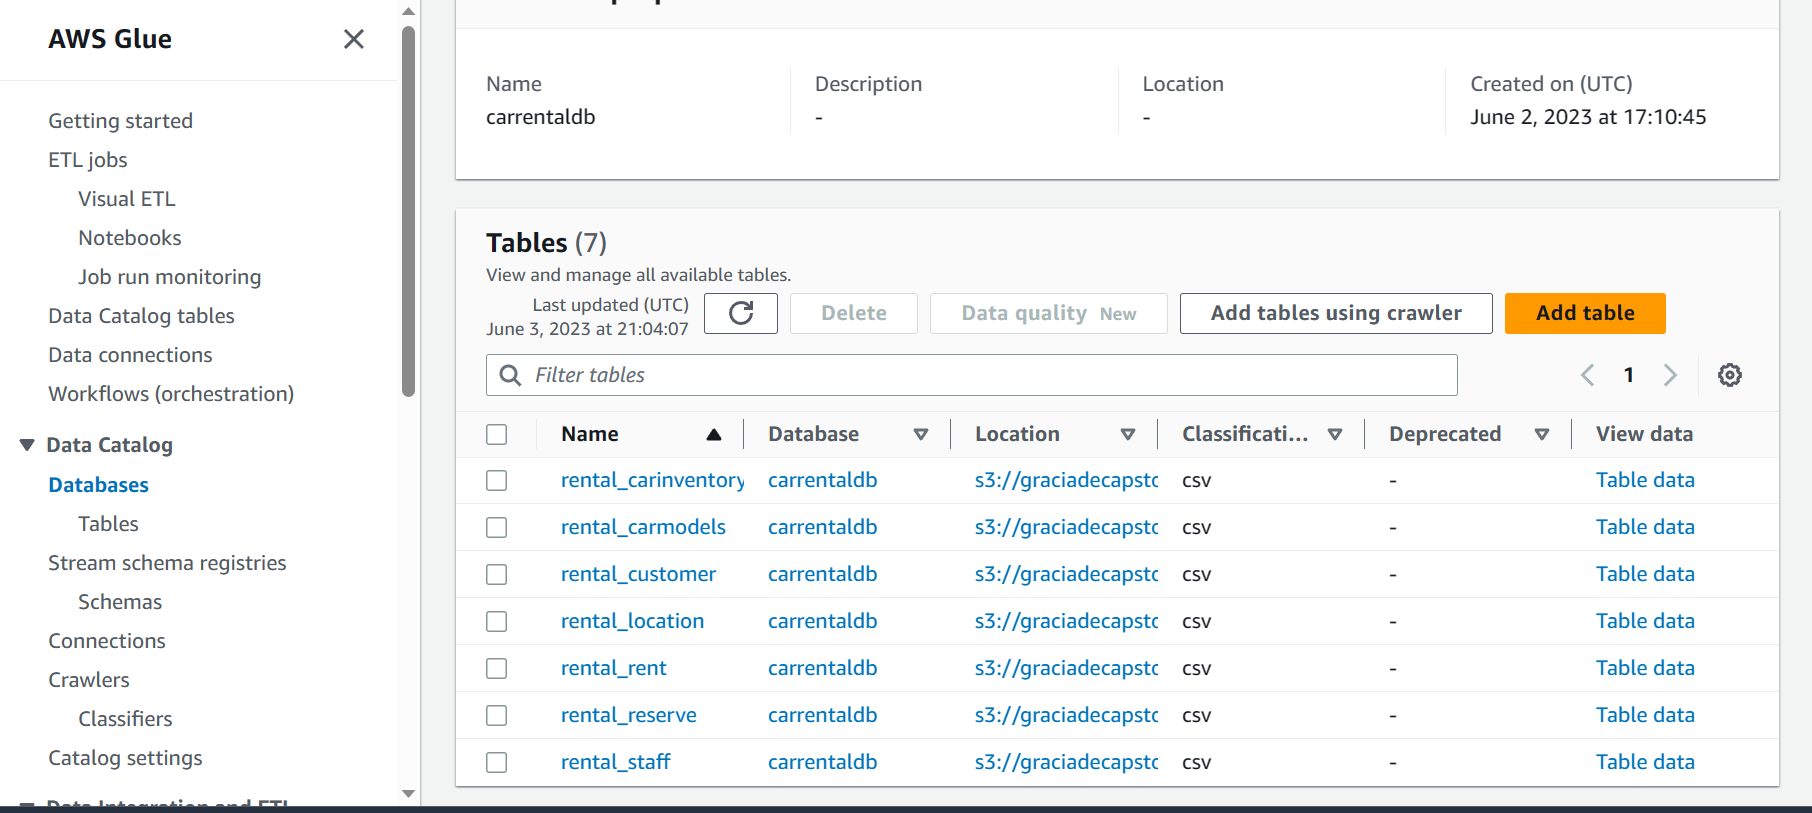

 ### QUERIED WITH ATHENA TO CHECK IF THE DATA WAS ACCURATE
 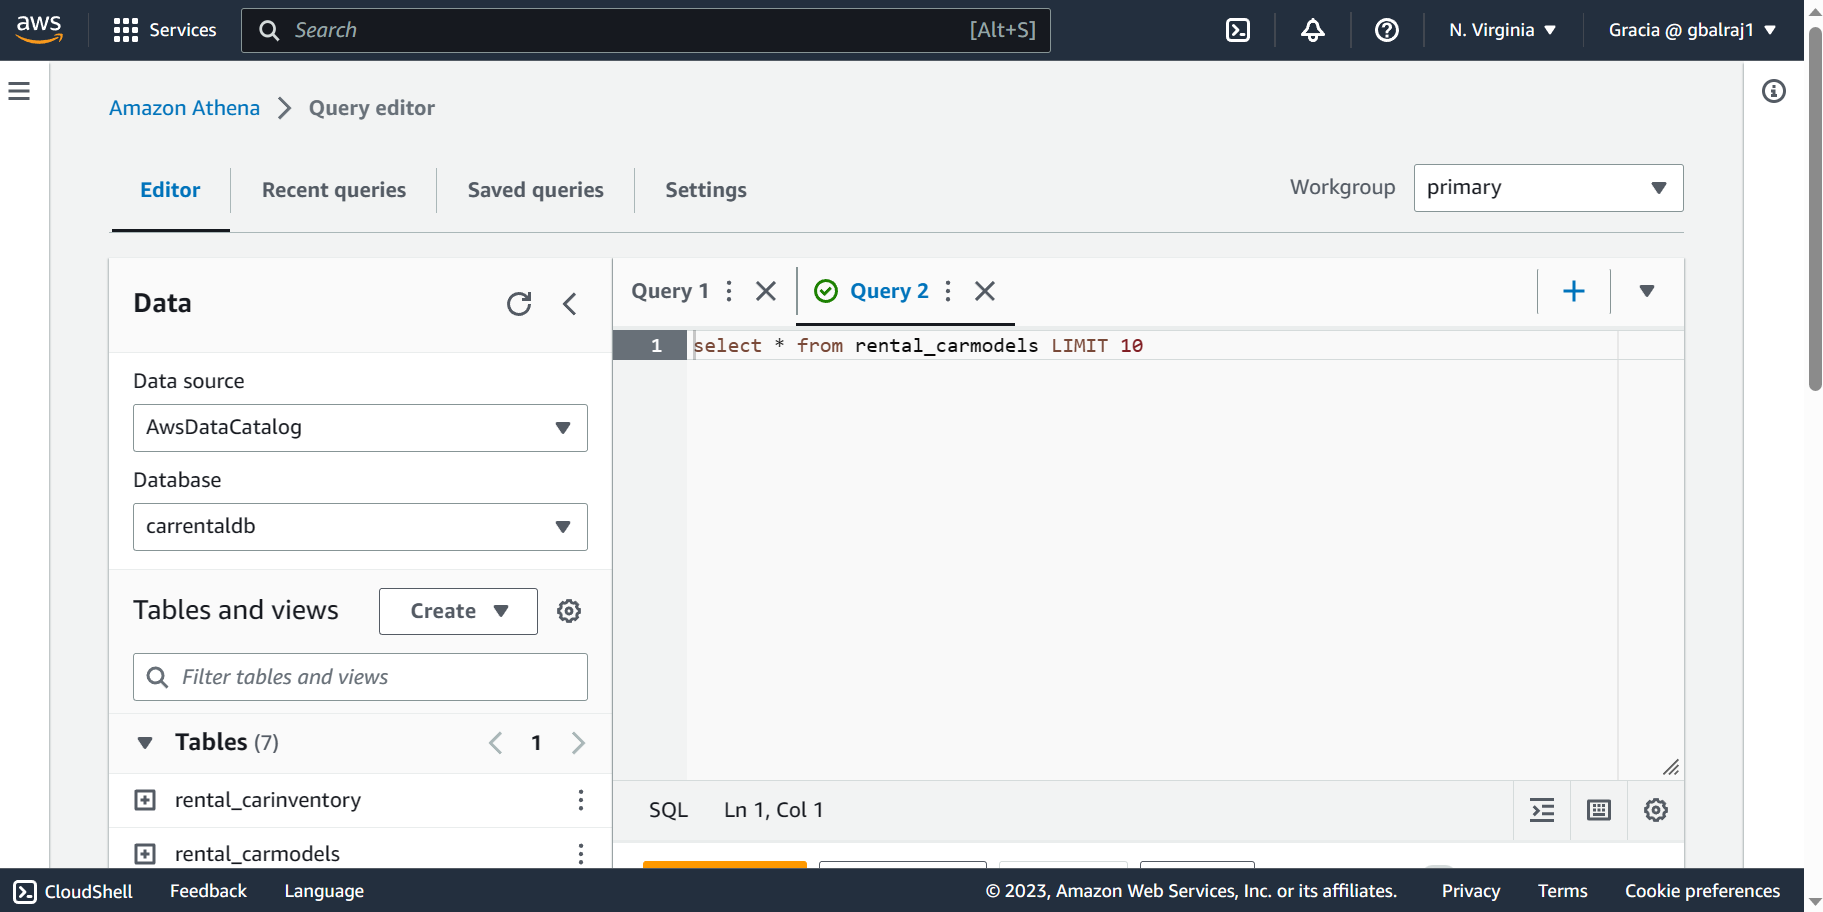
 
 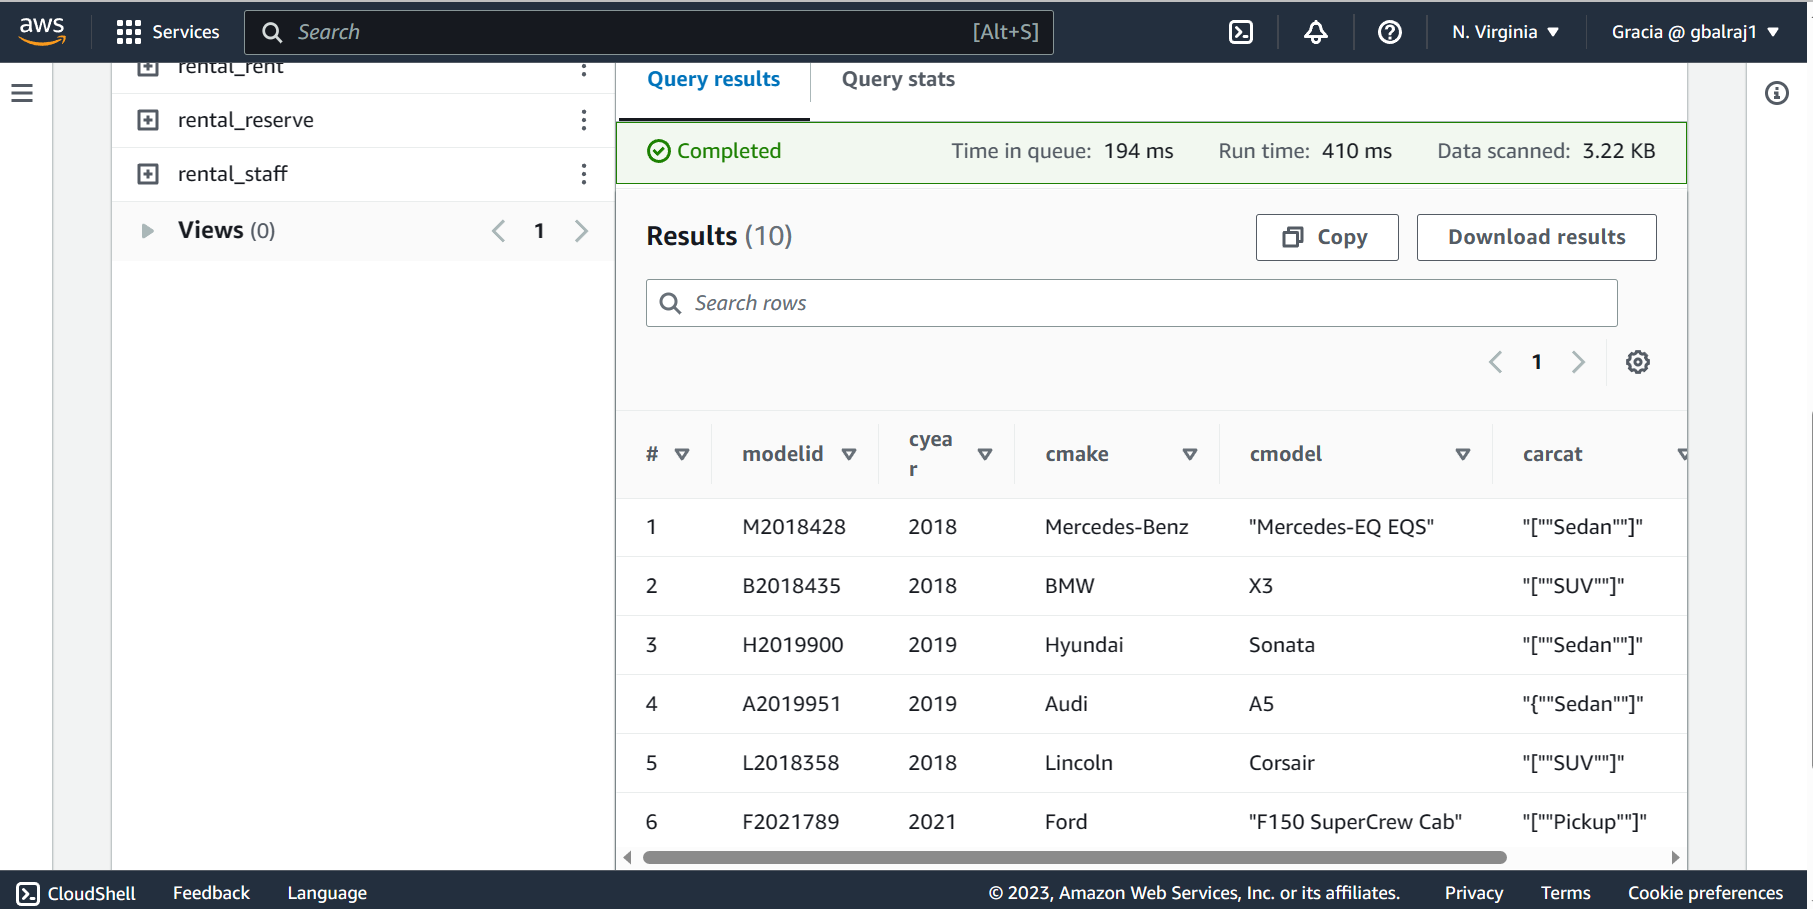

### CREATED A DATA LAKE WITH LAKE FORMATION AND ADDED USERS WITH DIFFERENT LEVELS OF PERMISSIONS 

#### CARRENTALUSER- HAS ALL PERMISSIONS
#### ARKANSASADMIN- HAS ADMIN PRIVILEGES ON ALL TABLES (state level administrator of the car rental company)
#### FAYETUSER and LITROCKUSER are the users at each location (Fayetville and Little Rock) in ARKANSAS and have permission to use all the tables in the database but cant grant access


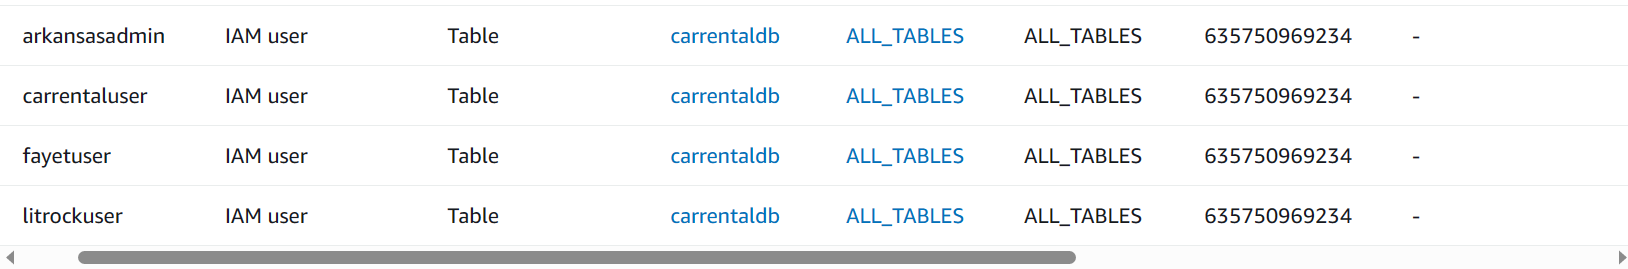
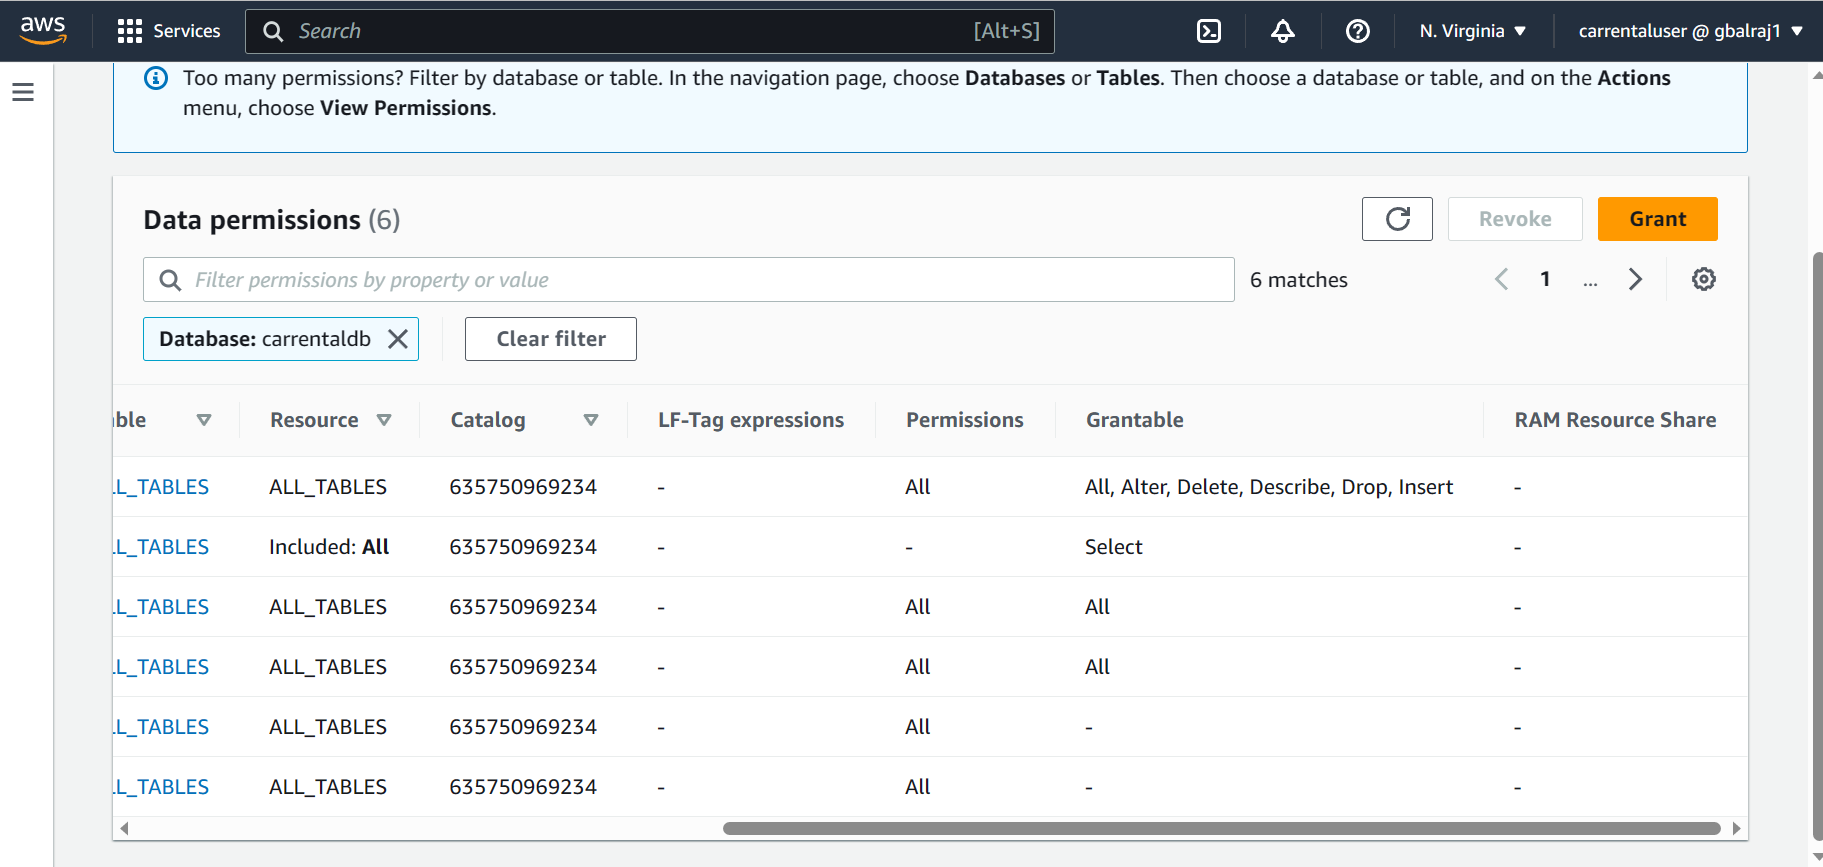


### A GLUE CRAWLER WAS CREATED TO CRAWL THE PARQUET TABLES IN S3 to create the Schema in the database

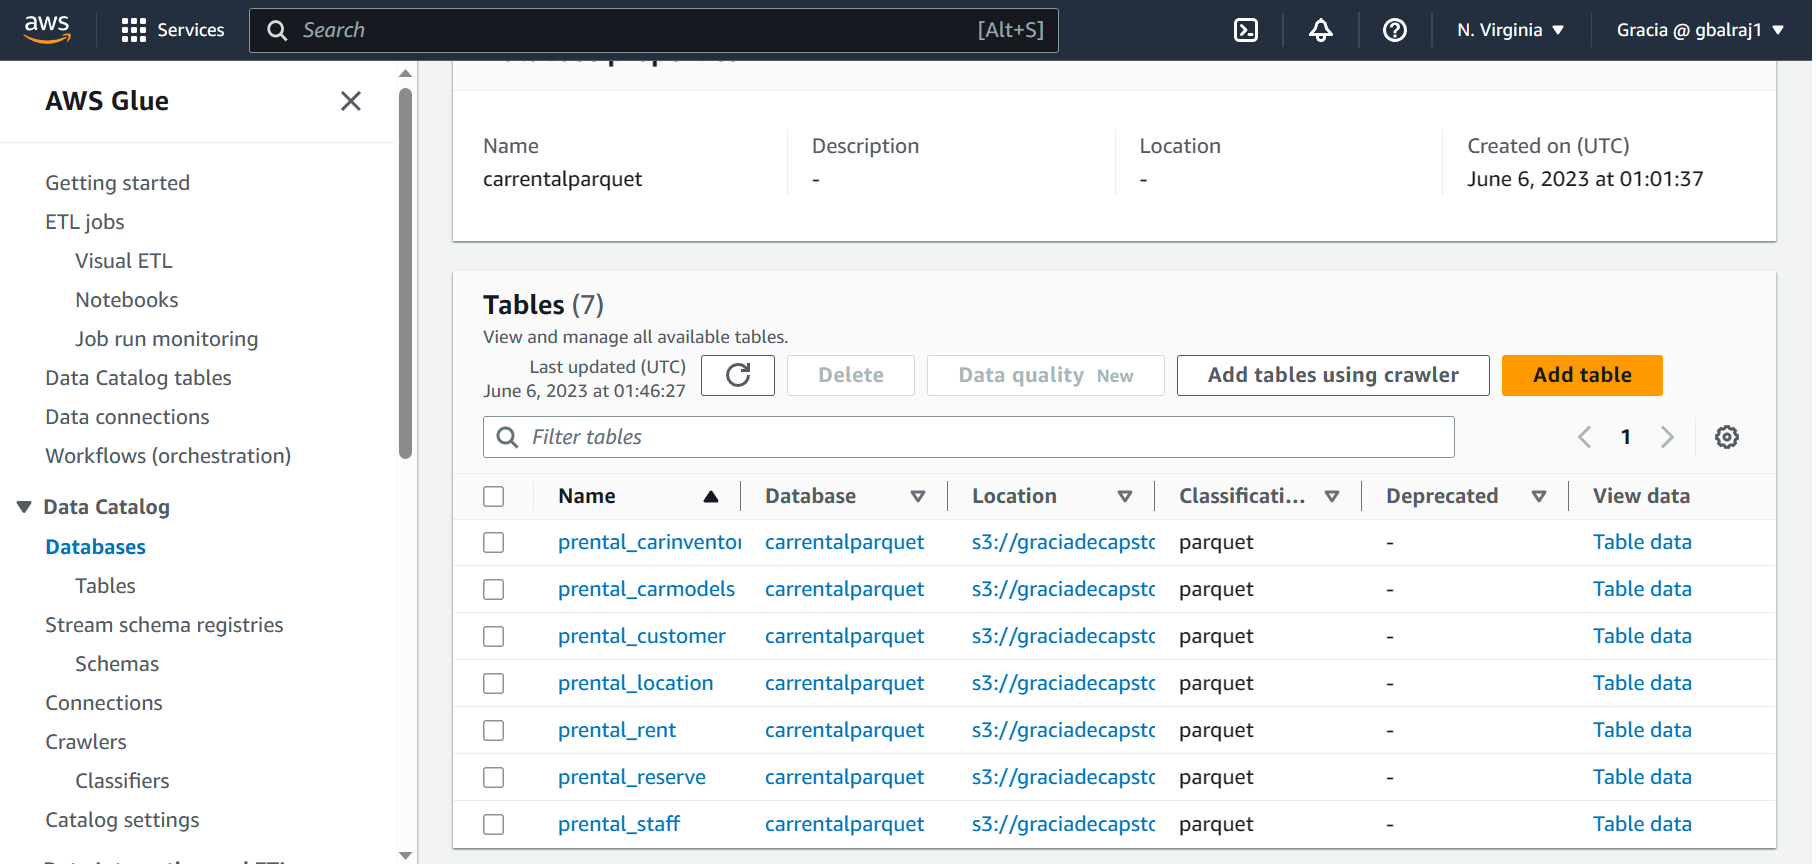

### QUERIED WITH ATHENA TO CHECK THE PARQUET TABLES

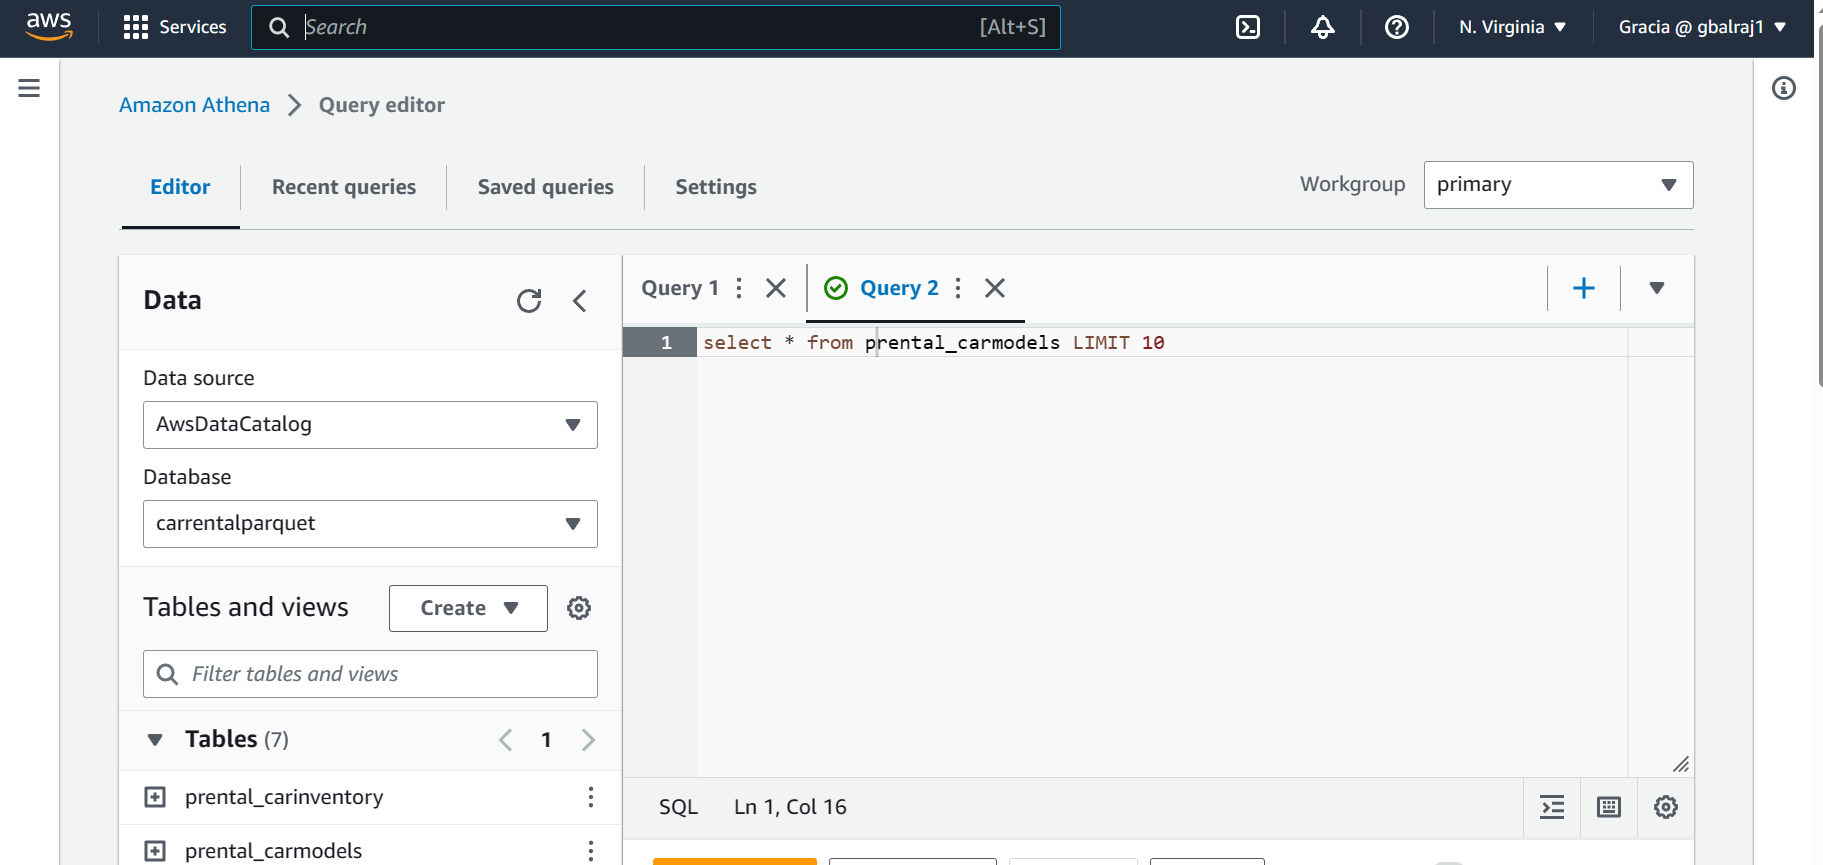
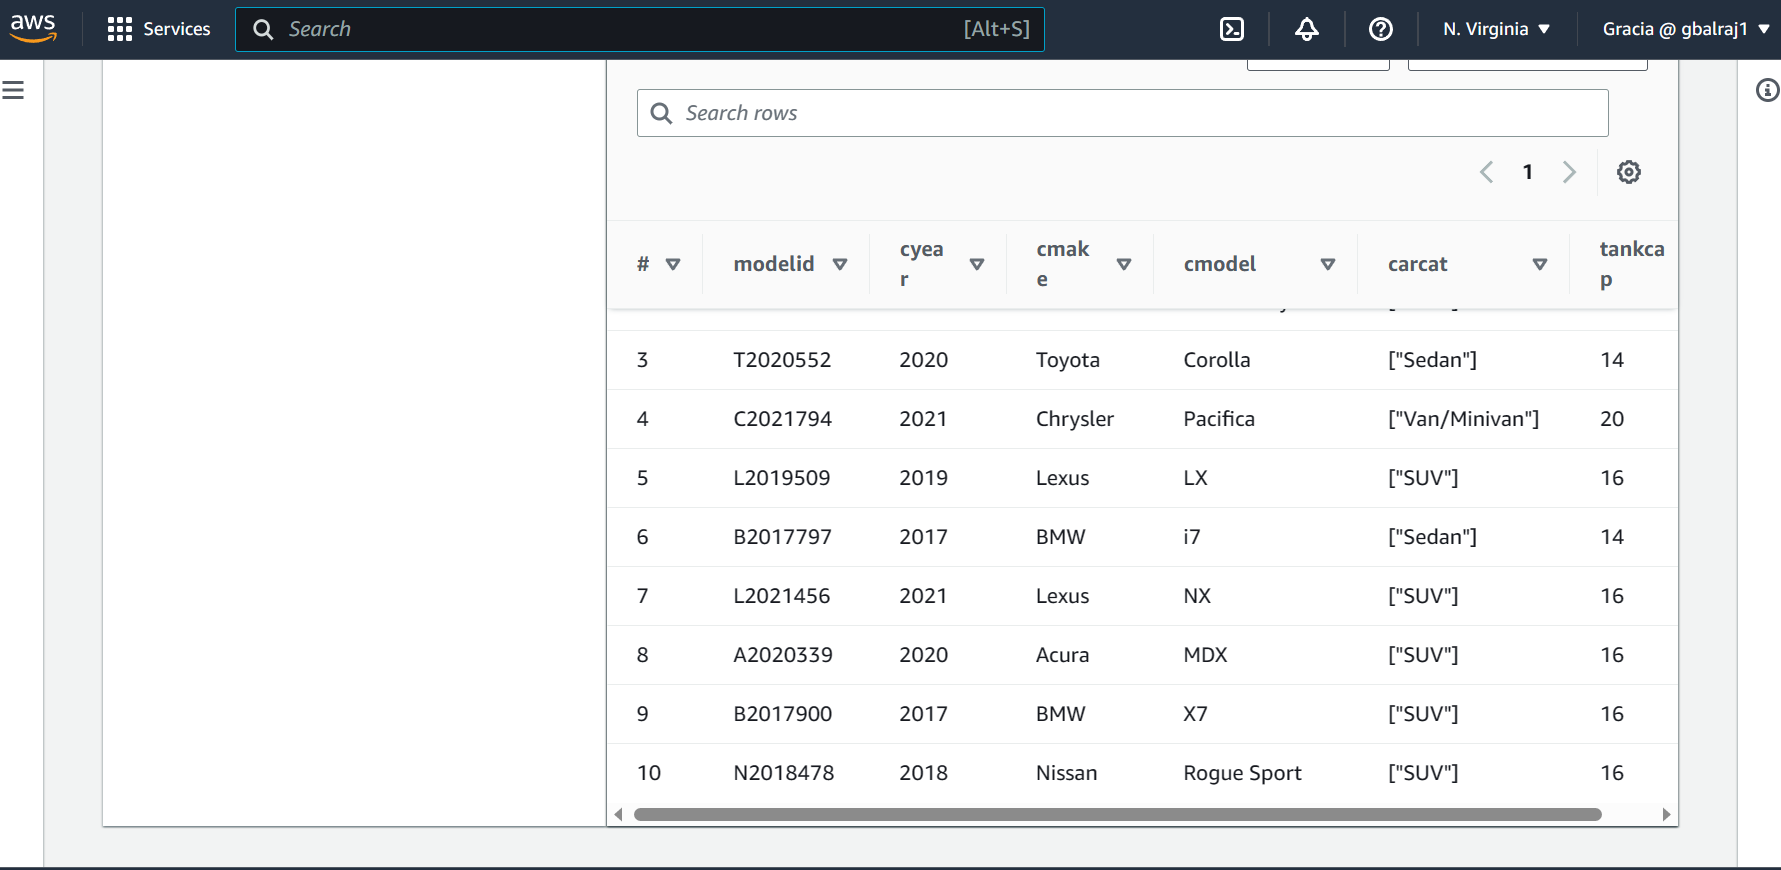



### QUERYING IN ATHENA TO MAKE SURE THE ANALYSIS TABLE IS ADDED AND VALUES ARE ACCURATE

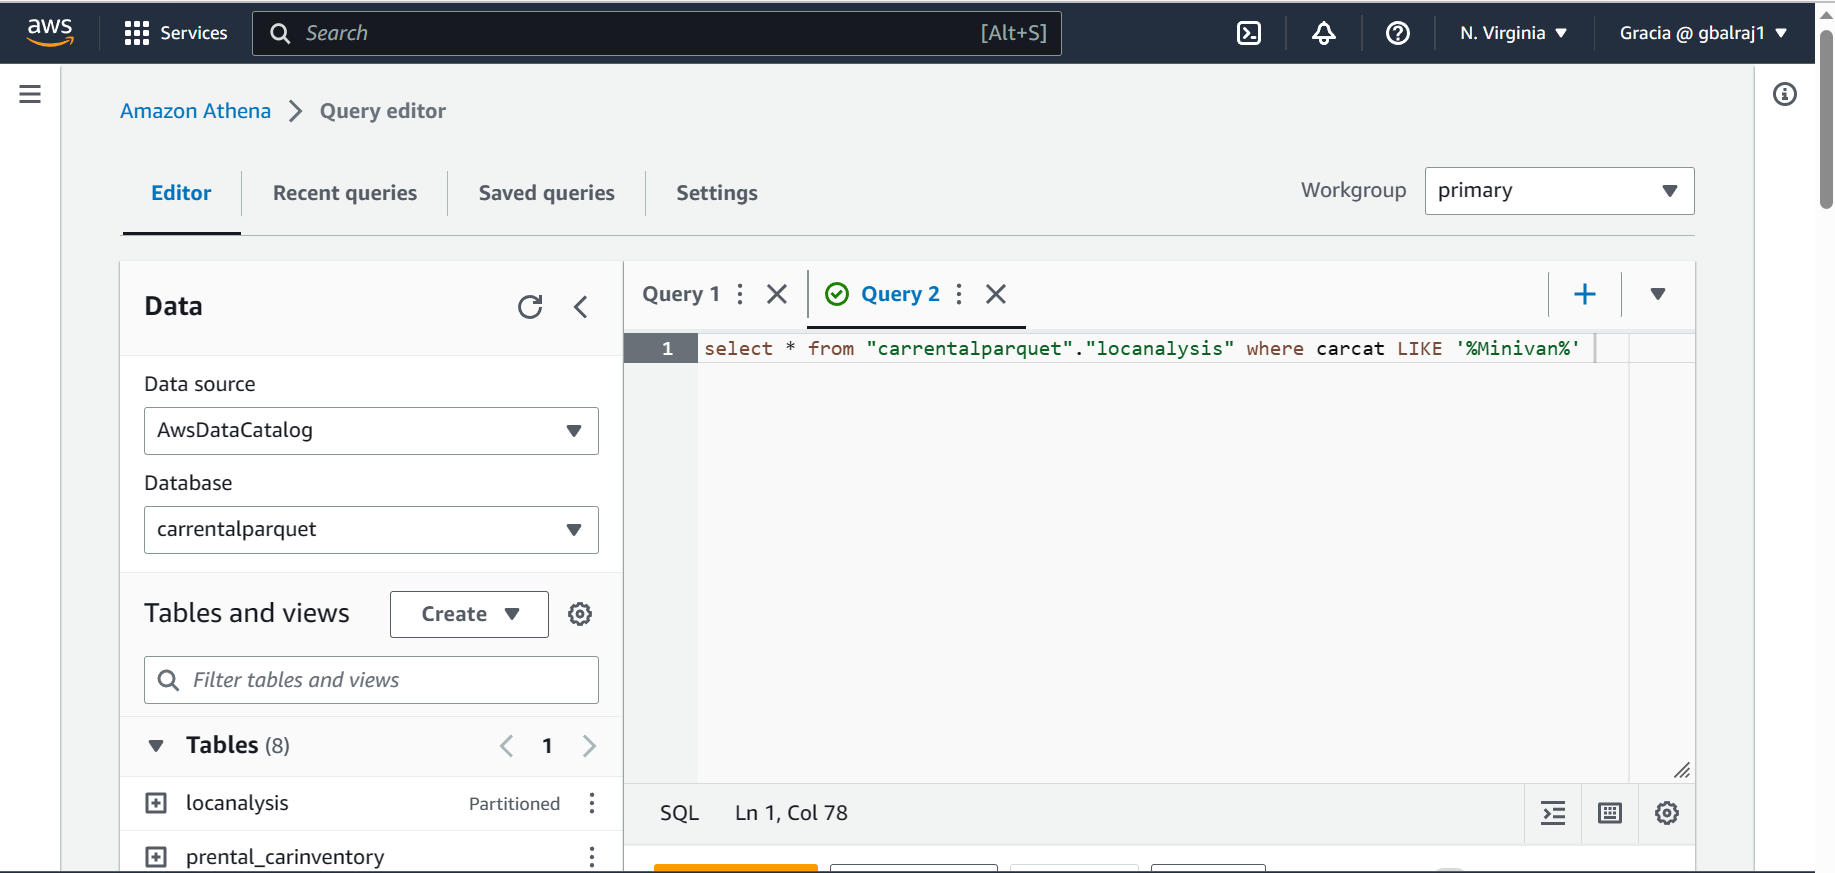

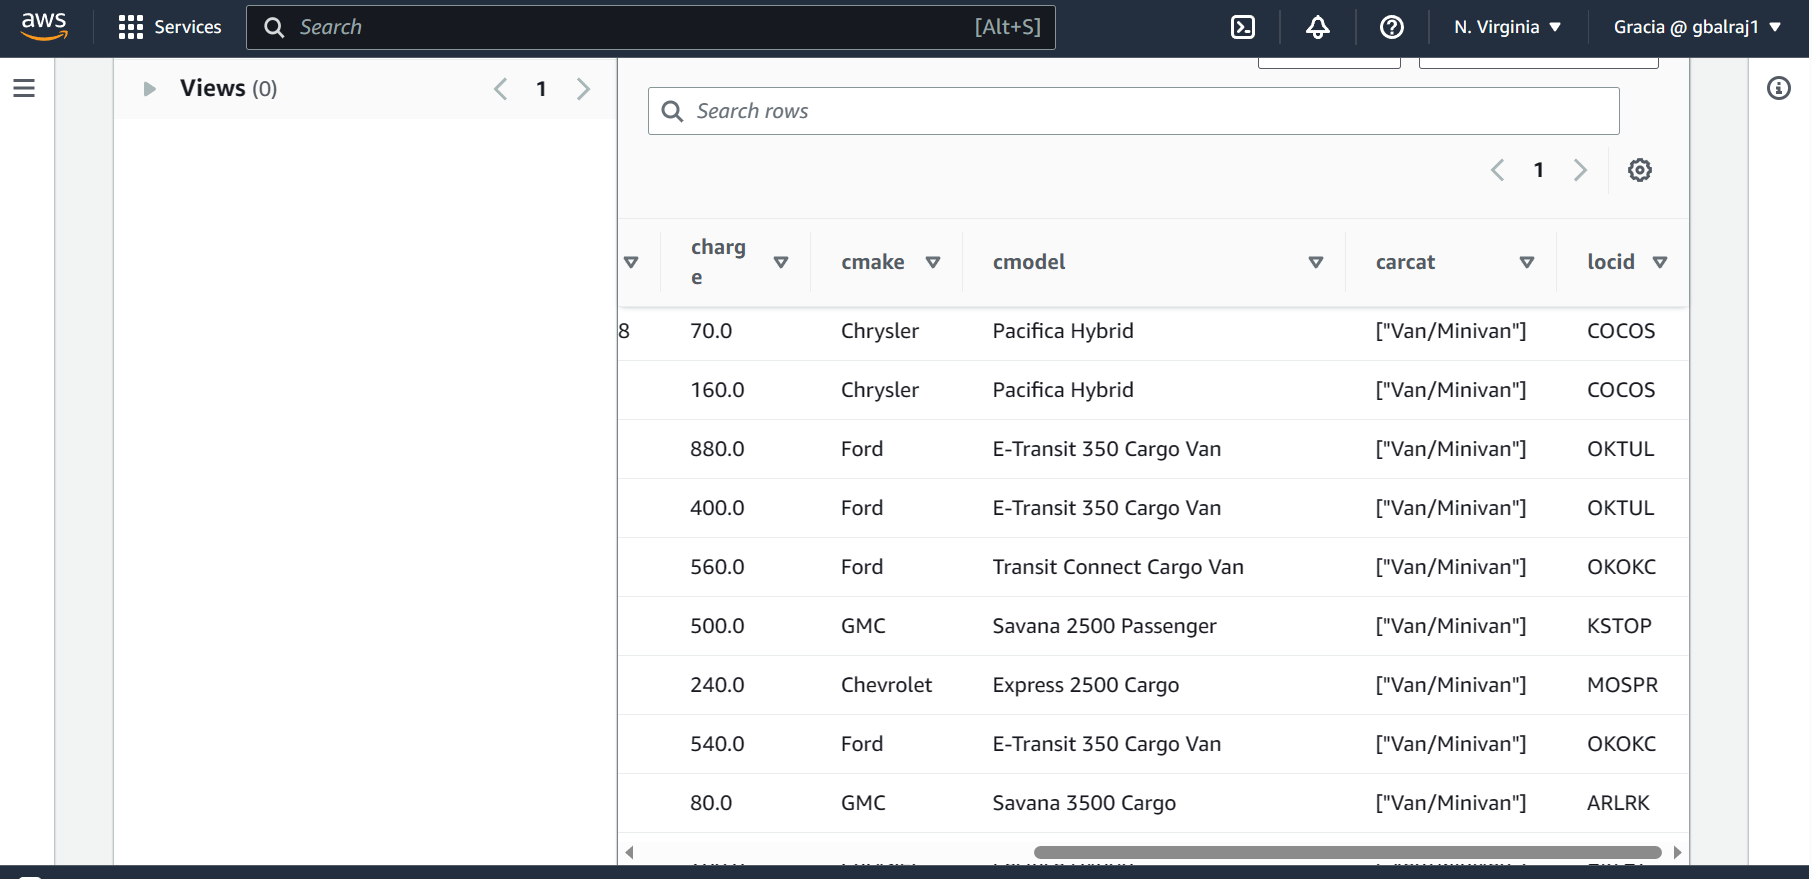



### CREATED REDSHIFT CLUSTER AND  EXTERNAL TABLES IN REDSHIFT 

In [ ]:
CREATE EXTERNAL SCHEMA carrental
FROM data catalog
database dev
iam_role 'arn:aws:iam::635750969234:role/capstoneredshiftrole'
create external database if not exists;

create external table carrental.location(
  locid VARCHAR(100),
  locaddr VARCHAR(100),
  loccity VARCHAR(100),
  locstate VARCHAR(100)
  loczip VARCHAR(100),
  locphone VARCHAR(100),
  locemail VARCHAR(100),
  loclat VARCHAR(100),
  loclong VARCHAR(100)
)
stored as parquet
location 's3://graciadecapstone/verifyrental/location/';

create external table carrental.carinventory(
  vinno VARCHAR(100),
  locid VARCHAR(100),
  modelid VARCHAR(100),
  avail VARCHAR(100),
  dlyrent VARCHAR(100)
)
stored as parquet
location 's3://graciadecapstone/verifyrental/carinventory/';

create external table carrental.customer(
  custid VARCHAR(100),
  custdlno VARCHAR(100),
  custname VARCHAR(100),
  custadd VARCHAR(100),
  custcity VARCHAR(100),
  custstate VARCHAR(100),
  custzip VARCHAR(100),
  custdob VARCHAR(100),
  custphone VARCHAR(100),
  custemail VARCHAR(100),
  pymethod VARCHAR(100),
  cardno VARCHAR(100),
  expmth VARCHAR(100),
  expyr VARCHAR(100)
)
stored as parquet
location 's3://graciadecapstone/verifyrental/customer/';

create external table carrental.staff(
   staffid VARCHAR(100),
  locid VARCHAR(100),
  staffname VARCHAR(100),
  staffadd VARCHAR(100),
  staffcity VARCHAR(100),
  staffstate VARCHAR(100),
  staffzip VARCHAR(100),
  staffdob VARCHAR(100),
  staffdoj VARCHAR(100),
  staffsex VARCHAR(100),
  staffphone VARCHAR(100),
  staffemail VARCHAR(100)
)
stored as parquet
location 's3://graciadecapstone/verifyrental/staff/';

create external table carrental.carmodels(
   modelid VARCHAR(100),
  cyear VARCHAR(100),
  cmake VARCHAR(100),
  cmodel VARCHAR(100),
  carcat VARCHAR(100),
  tankcap VARCHAR(100)
)
stored as parquet
location 's3://graciadecapstone/verifyrental/carmodels/';

create external table carrental.reserve(
  reserveid VARCHAR(100),
  locid VARCHAR(100),
  vinno VARCHAR(100),
  custid VARCHAR(100),
  resdate VARCHAR(100),
  restime VARCHAR(100),
  pkdate VARCHAR(100),
  pktime VARCHAR(100),
  drpdate VARCHAR(100),
  drptime VARCHAR(100),
  cancdate VARCHAR(100),
  canctime VARCHAR(100)
)
stored as parquet
location 's3://graciadecapstone/verifyrental/reserve/';

create external table carrental.rent(
  rentid VARCHAR(100),
  locid VARCHAR(100),
  vinno VARCHAR(100),
  custid VARCHAR(100),
  staffid VARCHAR(100),
  insurance VARCHAR(100),
  pkdate VARCHAR(100),
  pktime VARCHAR(100),
  odoout VARCHAR(100),
  drpdate VARCHAR(100),
  drptime VARCHAR(100),
  gasin VARCHAR(100),
  odoin VARCHAR(100),
  gasrate VARCHAR(100),
  charge VARCHAR(100)
)
stored as parquet
location 's3://graciadecapstone/verifyrental/rent/';

#NEW TABLE FOR ANALYSIS
create external table carrental.locanalysis
(
  vinno VARCHAR(100),
  staffid VARCHAR(100),
  pkdate VARCHAR(100),
  charge float,
  cmake VARCHAR(100),
  cmodel VARCHAR(100),
  carcat VARCHAR(100),
  locid VARCHAR(100)
 )
stored as parquet
location 's3://graciadecapstone/verifyrental/modelanalysis/';



#### QUERIED ON REDSHIFT QUERY EDITOR TO CHECK IF THE FILE FOR ANALYSIS IS LOADED INTO THE DATA WAREHOUSE ACCURATELY

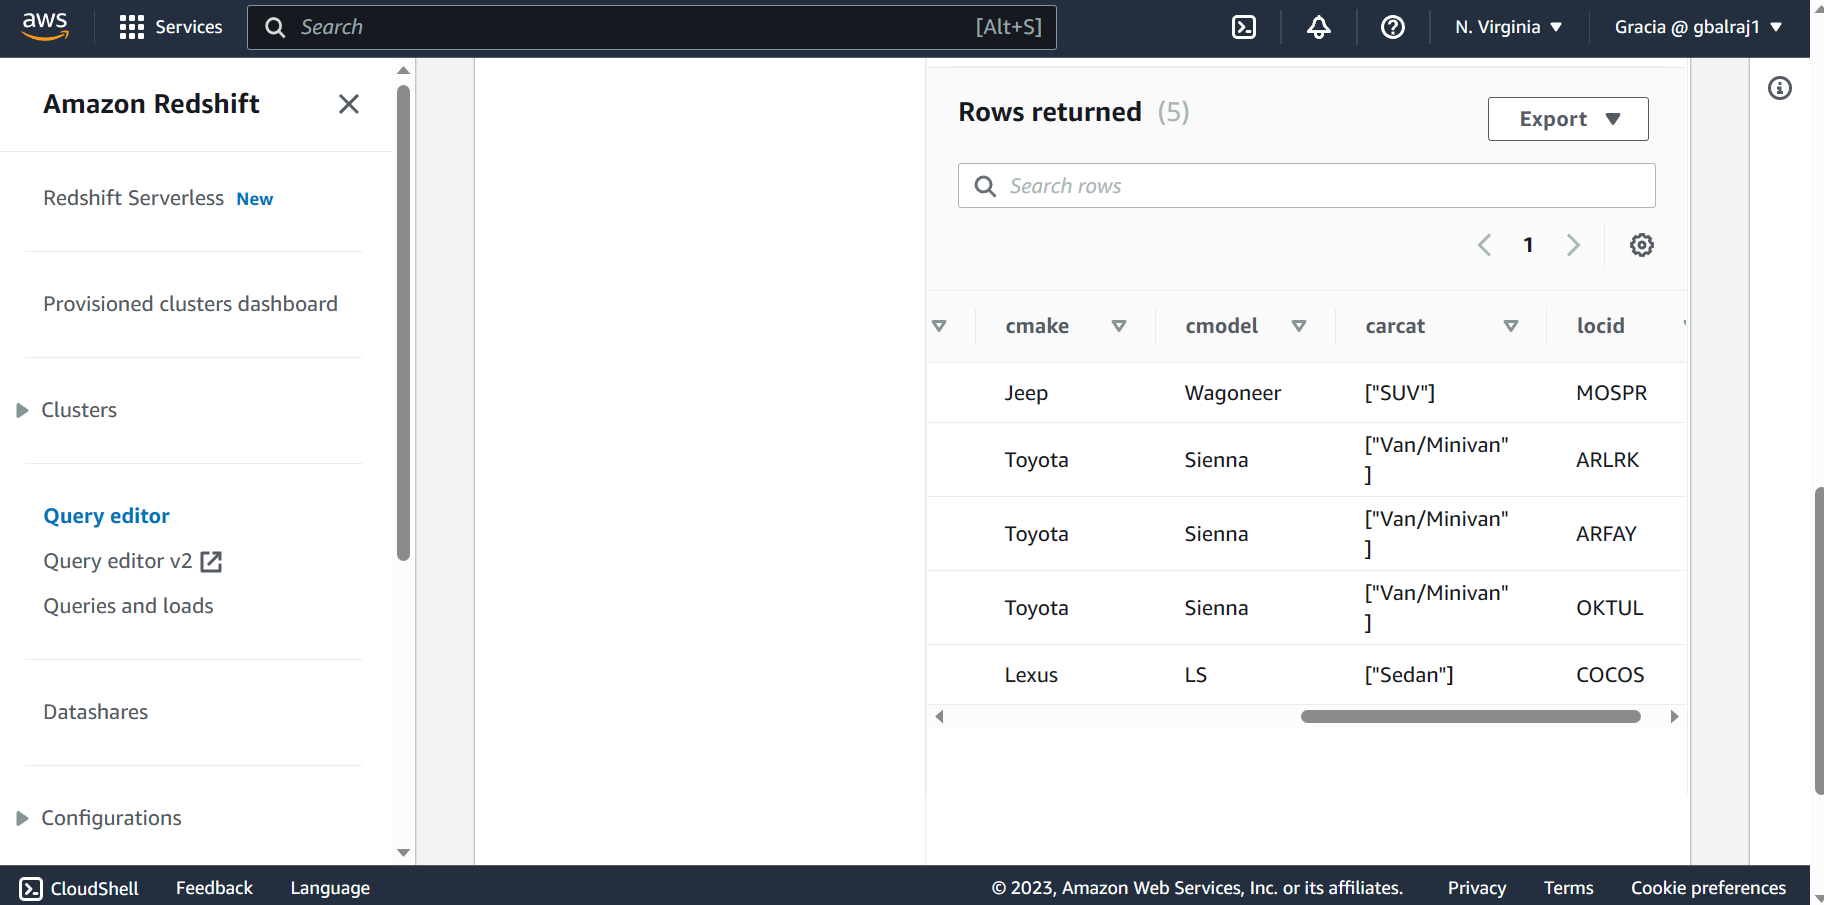

##### Imported the neccessary Python packages.

In [ ]:
import psycopg2
import getpass
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import text
import matplotlib.pyplot as plt

### # Created connection to Redshift and the query for analysis and put results in Pandas Dataframe

In [ ]:
redshift_endpoint = "redshift-carrental.cainodjqmywn.us-east-1.redshift.amazonaws.com"
redshift_user = 'awsuser'
redshift_pass = getpass.getpass()
port = 5439
dbname = 'dev'

In [ ]:
engine_string = "postgresql+psycopg2://%s:%s@%s:%d/%s" \
% (redshift_user, redshift_pass, redshift_endpoint, port, dbname)
engine = create_engine(engine_string)

sql = """
select * 
from carrental.locanalysis 
order by locid
"""

tables = []
output = engine.execute(sql)
for row in output:
    tables.append(row)
tables

In [ ]:
carrental_df = pd.read_sql_query(text(sql), engine)
carrental_df

 #### OUTPUT
 
 vinno staffid      pkdate  charge       cmake  \
0    8S9SK93078F851249   11159   6/10/2022   160.0        Audi   
1    6T4DP96174X705038   11156    7/4/2022   490.0      Toyota   
2    7N6ST17657Y696538   11158   5/27/2022   270.0   Chevrolet   
3    6B9RT49939U285195   11158  11/19/2022   100.0       MAZDA   
4    4A8CP55216S918271   11157  10/26/2022   243.0         GMC   
..                 ...     ...         ...     ...         ...   
495  5E2BR16493G689619   11138   12/6/2022   120.0        Audi   
496  7L3EM96518K798080   11137   12/7/2022   120.0        Ford   
497  7W1AV87372J223648   11136  12/19/2022   140.0        Ford   
498  7F3UW59485W489858   11140  12/13/2022    40.0  Volkswagen   
499  7C4MG48508X658809   11139    9/1/2022   120.0         Ram   

                    cmodel           carcat  locid  
0                   e-tron          ["SUV"]  ARFAY  
1                     bZ4X          ["SUV"]  ARFAY  
2                 Bolt EUV    ["Hatchback"]  ARFAY  
3                     CX-5          ["SUV"]  ARFAY  
4    Savana 2500 Passenger  ["Van/Minivan"]  ARFAY  
..                     ...              ...    ...  
495       e-tron Sportback          ["SUV"]  OKTUL  
496       Ranger SuperCrew       ["Pickup"]  OKTUL  
497       Ranger SuperCrew       ["Pickup"]  OKTUL  
498                   Taos          ["SUV"]  OKTUL  
499    ProMaster Cargo Van  ["Van/Minivan"]  OKTUL  

[500 rows x 8 columns]
​

#### Cleaning the data and getting it ready for plotting the bar graph

In [ ]:
#Removing the box brackets from the carcat column
carrental_df['carcat']=carrental_df['carcat'].str.replace('[','')
carrental_df['carcat']=carrental_df['carcat'].str.replace(']','')
carrental_df['carcat']=carrental_df['carcat'].str.replace('{','')
carrental_df['carcat']=carrental_df['carcat'].str.replace('}','')
carrental_df['carcat']=carrental_df['carcat'].str.replace('Van/','')
#Extracting the year from pkdate column and converting to integer
carrental_df['pkdate']=pd.to_datetime(carrental_df['pkdate'])
carrental_df['pkdate']=carrental_df['pkdate'].dt.year
carrental_df['pkdate']=pd.to_numeric(carrental_df['pkdate'])
carrental_df

#### OUTPUT
	vinno	staffid	pkdate	charge	cmake	cmodel	carcat	locid
0	1Z1NL59517Y487276	11159	2023	420.0	Nissan	Pathfinder	"SUV"	ARFAY <br>
1	6T4DP96174X705038	11156	2022	490.0	Toyota	bZ4X	"SUV"	ARFAY <br>
2	1Z1NL59517Y487276	11158	2022	400.0	Nissan	Pathfinder	"SUV"	ARFAY <br>
3	6B9RT49939U285195	11158	2022	100.0	MAZDA	CX-5	"SUV"	ARFAY  <br>
4	9H5UK70390C861765	11158	2015	250.0	Nissan	Rogue Sport	"SUV"	ARFAY  <br>
...	...	...	...	...	...	...	...	... <br>
495	6T2CB28779X845662	11136	2022	560.0	Subaru	Solterra	"SUV"	OKTUL <br>
496	7C4MG48508X658809	11139	2022	120.0	Ram	ProMaster Cargo Van	"Minivan"	OKTUL <br>
497	6X9LG81932V910472	11137	2023	560.0	Chevrolet	Tahoe	"SUV"	OKTUL <br>
498	2X6VT73611B849448	11136	2023	480.0	Acura	RDX	"SUV"	OKTUL <br>
499	4C2HD55877X495762	11138	2022	140.0	Tesla	Model S	"Sedan"	OKTUL <br>
500 rows × 8 columns

#### Plotting the bar graph for chosen location and year 


In [ ]:
#initialzing which year and location the analysis is for-this can be changed according to what is needed for analysis
year=2022
carsloc="OKTUL"
#creating a dataframe satisfying the condition of year and location
caryr_df=carrental_df.loc[(carrental_df['locid'] == carsloc) & (carrental_df['pkdate'] == year)]
caryr_df

#### OUTPUT


           vinno	staffid	pkdate	charge	cmake	cmodel	carcat	locid 
436	9V8BH40638A234595	11139	2022	700.0	Toyota	RAV4	"SUV"	OKTUL <br>
438	6Z4VX69439P501721	11137	2022	880.0	Mitsubishi	Outlander PHEV	"SUV"	OKTUL <br>
439	1Y9PS47434K493133	11139	2022	300.0	Audi	Q8	"SUV"	OKTUL <br>
440	8T5AZ94363W851254	11139	2022	560.0	Audi	S5	"Sedan"	OKTUL <br>
441	8U3SK48563N319669	11139	2022	420.0	Audi	e-tron	"SUV"	OKTUL <br>
443	9J7NC25534B588245	11139	2022	880.0	Volvo	XC40	"SUV"	OKTUL <br>
445	8V8DW31830M911209	11138	2022	90.0	Ford	Transit Connect Passenger Wagon	"Minivan"	OKTUL <br>
448	6H9MG53578A763849	11138	2022	40.0	Maserati	Grecale	"SUV"	OKTUL <br>
449	2Z9GV73188J520897	11136	2022	770.0	Subaru	Forester	"SUV"	OKTUL <br>
450	3V5ZC27453L203410	11136	2022	120.0	Volkswagen	Arteon	"Sedan"	OKTUL <br>
451	4C2HD55877X495762	11138	2022	140.0	Tesla	Model S	"Sedan"	OKTUL <br>
453	2V1JP71023L362854	11140	2022	250.0	BMW	X3	"SUV"	OKTUL <br>
454	8E3MR12936K682707	11136	2022	480.0	Acura	MDX	"SUV"	OKTUL <br>
456	5J3UC81102E364082	11137	2022	480.0	MINI	Hardtop 4 Door	"Hatchback"	OKTUL <br>
459	1N6JN77909R499284	11137	2022	330.0	Audi	Q5	"SUV"	OKTUL <br>
460	1M6TY64896P412245	11140	2022	480.0	Volvo	S60	"Sedan"	OKTUL <br>
461	9H3CX56801H996851	11140	2022	720.0	Subaru	Ascent	"SUV"	OKTUL <br>
462	8X8XM90845X241794	11140	2022	70.0	Jeep	Wrangler Unlimited 4xe	"SUV"	OKTUL <br>
463	9A8HW40741F392662	11139	2022	600.0	Subaru	Ascent	"SUV"	OKTUL <br>
465	7Z1ZR50317M351313	11136	2022	880.0	Ford	E-Transit 350 Cargo Van	"Minivan"	OKTUL <br>
466	9B1JV26871V994102	11137	2022	700.0	Audi	e-tron S Sportback	"SUV"	OKTUL <br>
467	7V2YK77218X576693	11138	2022	400.0	Ford	E-Transit 350 Cargo Van	"Minivan"	OKTUL <br>
469	4C6KE28609T804067	11139	2022	500.0	Subaru	Legacy	"Sedan"	OKTUL <br>
472	5F4CS37026R916877	11137	2022	160.0	BMW	8 Series	"Sedan"	OKTUL <br>
473	7S9UJ91201V200455	11139	2022	630.0	Alfa Romeo	Tonale	"SUV"	OKTUL <br>
474	1Z1GT32383N231807	11140	2022	90.0	Nissan	LEAF	"Hatchback"	OKTUL <br>
476	2Z1ME78668L981453	11137	2022	90.0	Chevrolet	Silverado 1500 Regular Cab	"Pickup"	OKTUL <br>
480	7L3EM96518K798080	11137	2022	120.0	Ford	Ranger SuperCrew	"Pickup"	OKTUL <br>
481	4L3DT52511Z553484	11136	2022	120.0	Audi	e-tron S	"SUV"	OKTUL <br>
482	7W1AV87372J223648	11136	2022	140.0	Ford	Ranger SuperCrew	"Pickup"	OKTUL <br>
484	7F3UW59485W489858	11140	2022	40.0	Volkswagen	Taos	"SUV"	OKTUL <br>
488	6T2CB28779X845662	11136	2022	560.0	Subaru	Solterra	"SUV"	OKTUL <br>
489	5E2BR16493G689619	11138	2022	120.0	Audi	e-tron Sportback	"SUV"	OKTUL <br>
490	9W7ZJ60564Z549495	11138	2022	420.0	Porsche	Cayenne	"SUV"	OKTUL <br>
491	2S8NC21366Y867623	11138	2022	160.0	Volkswagen	Golf GTI	"Hatchback"	OKTUL <br>
492	7C4MG48508X658809	11139	2022	120.0	Ram	ProMaster Cargo Van	"Minivan"	OKTUL <br>
496	2X1AG36474C535962	11140	2022	90.0	Lexus	NX	"SUV"	OKTUL

In [ ]:
#Getting the count of each category
grouped_df=caryr_df["carcat"].value_counts().reset_index(name="count")
grouped_df

#### OUTPUT

    carcat	  count 
0	"SUV"	    21 <br>
1	"Sedan"	    6 <br>
2	"Minivan"	4 <br>
3	"Hatchback"	3 <br>
4	"Pickup"	3 <br>

In [ ]:
#Plotting the bar graph
grouped_df.plot(title="CAR DEMAND BY TYPE IN  "+ carsloc+" IN THE YEAR "+str(year),
                x='carcat',xlabel="CAR TYPE", y='count',label="number of cars",ylabel="NUMBER OF CARS USED", kind='bar')

#### OUTPUT

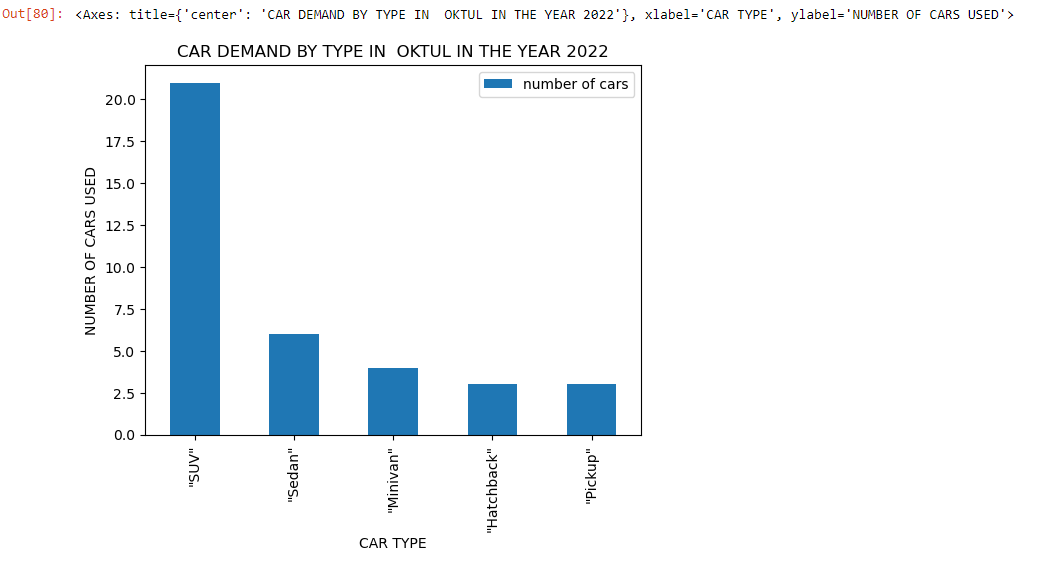